In [3]:
import cv2
import numpy as np

def binarizar_imagen(imagen, umbral=128):
 
    if len(imagen.shape) == 3:
        imagen_gris = cv2.cvtColor(imagen, cv2.COLOR_BGR2GRAY)
    else:
        imagen_gris = imagen
    
    
    _, imagen_binarizada = cv2.threshold(imagen_gris, umbral, 255, cv2.THRESH_BINARY)
    
    return imagen_binarizada


imagen = cv2.imread('Nioh.jpeg')
imagen_binarizada = binarizar_imagen(imagen, umbral=128)
cv2.imshow('Imagen Binarizada', imagen_binarizada)
cv2.imwrite('Imagen Binarizada.jpg', imagen_binarizada)




True

In [4]:
import cv2
import numpy as np

def operaciones_imagenes(img1, img2, umbral=128):
  
    img1_gris = cv2.cvtColor(img1, cv2.COLOR_BGR2GRAY)
    img2_gris = cv2.cvtColor(img2, cv2.COLOR_BGR2GRAY)
    
    
    _, img1_bin = cv2.threshold(img1_gris, umbral, 255, cv2.THRESH_BINARY)
    _, img2_bin = cv2.threshold(img2_gris, umbral, 255, cv2.THRESH_BINARY)
    
    
    suma = cv2.add(img1_bin, img2_bin)
    resta = cv2.subtract(img1_bin, img2_bin)
    
  
    and_op = cv2.bitwise_and(img1_bin, img2_bin)
    or_op = cv2.bitwise_or(img1_bin, img2_bin)
    xor_op = cv2.bitwise_xor(img1_bin, img2_bin)
    
    return suma, resta, and_op, or_op, xor_op


img1 = cv2.imread('limones.jpg')
img2 = cv2.imread('limones2.jpg')
suma, resta, and_op, or_op, xor_op = operaciones_imagenes(img1, img2)


cv2.imwrite('limonesmod.jpg', img1)
cv2.imwrite('limonesmod2.jpg', img2) 


True

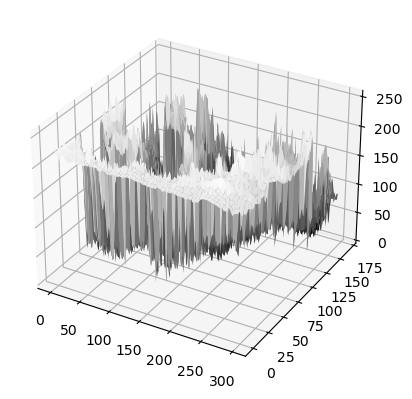

In [8]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

def mostrar_imagen_3d(imagen):
   
    if imagen is None:
        print("Error: No se pudo cargar la imagen. Verifica la ruta del archivo.")
        return
    
    if len(imagen.shape) == 3:
        imagen = cv2.cvtColor(imagen, cv2.COLOR_BGR2GRAY)
    
    x = np.arange(imagen.shape[1])
    y = np.arange(imagen.shape[0])
    x, y = np.meshgrid(x, y)
    
    fig = plt.figure()
    ax = fig.add_subplot(111, projection='3d')
    
    ax.plot_surface(x, y, imagen, cmap='gray')
    
    plt.show()


imagen = cv2.imread('Spiderman.jpeg', cv2.IMREAD_GRAYSCALE)
mostrar_imagen_3d(imagen)



In [11]:
import cv2
import numpy as np

def transformacion_negativa(imagen):
    return 255 - imagen

def transformacion_lineal(imagen, alpha=1.0, beta=0):
    return cv2.convertScaleAbs(imagen, alpha=alpha, beta=beta)

def transformacion_logaritmica(imagen, c=1):
    imagen_log = c * np.log(1 + imagen.astype(np.float64))
    return cv2.convertScaleAbs(imagen_log)

def transformacion_exponencial(imagen, c=1, gamma=1.0):
    imagen_exp = c * np.power(imagen.astype(np.float64), gamma)
    return cv2.convertScaleAbs(imagen_exp)

imagen = cv2.imread('nioh.jpeg', cv2.IMREAD_GRAYSCALE)

imagen_negativa = transformacion_negativa(imagen)
imagen_lineal = transformacion_lineal(imagen, alpha=1.5, beta=50)
imagen_logaritmica = transformacion_logaritmica(imagen, c=1)
imagen_exponencial = transformacion_exponencial(imagen, c=1, gamma=2.0)

cv2.imwrite('Negativa.jpg', imagen_negativa)
cv2.imwrite('Lineal.jpg', imagen_lineal)
cv2.imwrite('Logaritmica.jpg', imagen_logaritmica)
cv2.imwrite('Exponencial.jpg', imagen_exponencial)



True

El kernel Laplaceano es un operador de detección de bordes basado en la segunda derivada de la imagen. Este operador destaca los cambios rápidos de intensidad en la imagen, lo que ayuda a identificar los bordes. Es un método isotrópico, lo que significa que es igualmente sensible en todas las direcciones.

Por otro lado, el algoritmo de Canny es un detector de bordes más avanzado que sigue un enfoque de varios pasos: suavizado, cálculo del gradiente, supresión no máxima, umbralización con histéresis, y trazado de contornos. A diferencia del Laplaceano, Canny no solo identifica los bordes, sino que también reduce el ruido y conecta mejor los bordes para formar contornos más precisos.

Diferencias clave:

* Sensibilidad: Canny es más robusto frente al ruido debido al paso de suavizado inicial.
* Direccionalidad: Canny es direccional, mientras que el Laplaceano es isotrópico.
* Complejidad: Canny es más complejo y computacionalmente intensivo que el Laplaceano.